In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
sns.set()

C:\Games\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Games\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [4]:
data_raw = pd.read_excel('Airlines+Data.xlsx')
data_raw

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
data_raw.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [9]:
data = data_raw.copy()
data['t'] = range(1, len(data)+1)
data['t_square'] = data['t']**2
data['Date'] = pd.to_datetime(data['Month'], format="%b-%y")
data['month'] = data['Date'].dt.strftime('%b')
data['year'] = data['Date'].dt.strftime('%Y')
data

,Month,Passengers,t,t_square,Date,month,year
0,1995-01-01,112,1,1,1995-01-01,Jan,1995
1,1995-02-01,118,2,4,1995-02-01,Feb,1995
2,1995-03-01,132,3,9,1995-03-01,Mar,1995
3,1995-04-01,129,4,16,1995-04-01,Apr,1995
4,1995-05-01,121,5,25,1995-05-01,May,1995
...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,2002-08-01,Aug,2002
92,2002-09-01,355,93,8649,2002-09-01,Sep,2002
93,2002-10-01,306,94,8836,2002-10-01,Oct,2002
94,2002-11-01,271,95,9025,2002-11-01,Nov,2002


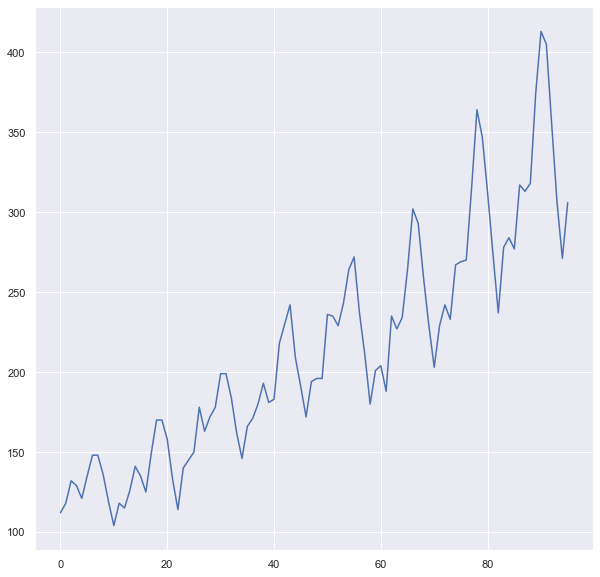

In [10]:
plt.figure(figsize = (10,10))
plt.plot(data['Passengers'])
plt.show()

<AxesSubplot:xlabel='year', ylabel='Passengers'>

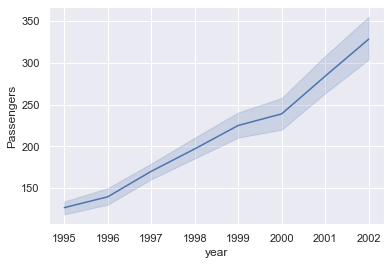

In [11]:
sns.lineplot(x = 'year', y = 'Passengers', data = data)

In [12]:
data_1 = data.drop(columns = ['Month', 'Date'])
data_with_dummies = pd.get_dummies(data_1)
data_with_dummies

,Passengers,t,t_square,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,...,month_Oct,month_Sep,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002
0,112,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,118,2,4,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,132,3,9,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,129,4,16,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,121,5,25,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,92,8464,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
92,355,93,8649,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
93,306,94,8836,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
94,271,95,9025,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
model = LinearRegression()
model.fit(data_with_dummies[['t', 't_square']][0:84], data_with_dummies['Passengers'][0:84])
pred = model.predict(data_with_dummies[['t', 't_square']][84:])
rmse = np.sqrt(np.mean((data_with_dummies['Passengers'][84:] - pred)**2))
rmse

48.05188897933072

In [14]:
X = data_with_dummies.drop('Passengers', axis = 1)

In [15]:
model = LinearRegression()
model.fit(X[0:84], np.log(data_with_dummies['Passengers'][0:84]))
pred = model.predict(X[84:])
rmse = np.sqrt(np.mean((data_with_dummies['Passengers'][84:] - np.exp(pred))**2))
rmse

27.83101337536523

In [16]:
model = LinearRegression()
model.fit(X[0:84], data_with_dummies['Passengers'][0:84])
pred = model.predict(X[84:])
rmse = np.sqrt(np.mean((data_with_dummies['Passengers'][84:] - pred)**2))
rmse

22.543116926510038

In [17]:
pred_df = pd.DataFrame()
pred_df['Month'] = data['Month'][84:]
pred_df['Actual'] = data_with_dummies['Passengers'][84:]
pred_df['Predicted'] = pred
pred_df['% Error'] = abs(data_with_dummies['Passengers'][84:] - pred)/data_with_dummies['Passengers'][84:]*100
pred_df

,Month,Actual,Predicted,% Error
84,2002-01-01,284,292.357168,2.942665
85,2002-02-01,277,294.873651,6.452582
86,2002-03-01,317,323.818706,2.151011
87,2002-04-01,313,319.335190,2.024022
88,2002-05-01,318,320.280245,0.717058
89,2002-06-01,374,345.939585,7.502785
90,2002-07-01,413,372.598926,9.782342
91,2002-08-01,405,373.401124,7.802192
92,2002-09-01,355,349.917607,1.431660
93,2002-10-01,306,326.434091,6.677807
